In [1]:
import pandas as pd
import datetime
from datetime import datetime
from datetime import timedelta
import time
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [2]:
jobs = pd.read_pickle('jobs_corrected')

In [76]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
partitions_count = pd.crosstab(jobs.PARTITION, jobs.STATE, margins=True)
partitions_count

STATE,CANCELLED,CANCELLED by 0,CANCELLED by 103040,CANCELLED by 108679,CANCELLED by 111694,CANCELLED by 112870,CANCELLED by 116648,CANCELLED by 123431,CANCELLED by 124006,CANCELLED by 141603,CANCELLED by 153500,CANCELLED by 156658,CANCELLED by 157854,CANCELLED by 159541,CANCELLED by 160027,CANCELLED by 161909,CANCELLED by 164131,CANCELLED by 168618,CANCELLED by 169069,CANCELLED by 170568,CANCELLED by 171822,CANCELLED by 174423,CANCELLED by 175381,CANCELLED by 177470,CANCELLED by 195064,CANCELLED by 196257,CANCELLED by 196703,CANCELLED by 198325,CANCELLED by 19853,CANCELLED by 199062,CANCELLED by 199066,CANCELLED by 20003,CANCELLED by 200152,CANCELLED by 200463,CANCELLED by 200524,CANCELLED by 200557,CANCELLED by 202251,CANCELLED by 204016,CANCELLED by 204903,CANCELLED by 207281,CANCELLED by 210390,CANCELLED by 222580,CANCELLED by 226488,CANCELLED by 229593,CANCELLED by 229954,CANCELLED by 232711,CANCELLED by 232756,CANCELLED by 232963,CANCELLED by 232972,CANCELLED by 234344,CANCELLED by 236565,CANCELLED by 237602,CANCELLED by 237813,CANCELLED by 239555,CANCELLED by 240347,CANCELLED by 240352,CANCELLED by 240564,CANCELLED by 248940,CANCELLED by 265144,CANCELLED by 27866,CANCELLED by 28585,CANCELLED by 308082,CANCELLED by 315345,CANCELLED by 315497,CANCELLED by 315567,CANCELLED by 318547,CANCELLED by 325262,CANCELLED by 333721,CANCELLED by 337100,CANCELLED by 337422,CANCELLED by 340466,CANCELLED by 341210,CANCELLED by 341333,CANCELLED by 342288,CANCELLED by 343241,CANCELLED by 344967,CANCELLED by 344973,CANCELLED by 345003,CANCELLED by 346243,CANCELLED by 346313,CANCELLED by 346360,CANCELLED by 347540,CANCELLED by 348923,CANCELLED by 349259,CANCELLED by 352001,CANCELLED by 353980,CANCELLED by 353983,CANCELLED by 353986,CANCELLED by 355660,CANCELLED by 366900,CANCELLED by 36697,CANCELLED by 375300,CANCELLED by 376360,CANCELLED by 377140,CANCELLED by 378062,CANCELLED by 397061,CANCELLED by 421502,CANCELLED by 423460,CANCELLED by 427821,CANCELLED by 453984,CANCELLED by 454080,CANCELLED by 465700,CANCELLED by 46963,CANCELLED by 470960,CANCELLED by 470961,CANCELLED by 473722,CANCELLED by 474346,CANCELLED by 478095,CANCELLED by 478542,CANCELLED by 479945,CANCELLED by 481000,CANCELLED by 482862,CANCELLED by 483348,CANCELLED by 483404,CANCELLED by 484051,CANCELLED by 484056,CANCELLED by 485036,CANCELLED by 486628,CANCELLED by 488581,CANCELLED by 491348,CANCELLED by 491383,CANCELLED by 491386,CANCELLED by 494347,CANCELLED by 494371,CANCELLED by 494657,CANCELLED by 494680,CANCELLED by 494710,CANCELLED by 496200,CANCELLED by 497246,CANCELLED by 497968,CANCELLED by 500380,CANCELLED by 5010,CANCELLED by 501421,CANCELLED by 502972,CANCELLED by 502975,CANCELLED by 50427,CANCELLED by 504442,CANCELLED by 505319,CANCELLED by 505346,CANCELLED by 505355,CANCELLED by 512947,CANCELLED by 515381,CANCELLED by 515423,CANCELLED by 515424,CANCELLED by 518360,CANCELLED by 524180,CANCELLED by 527620,CANCELLED by 53988,CANCELLED by 545929,CANCELLED by 546080,CANCELLED by 549980,CANCELLED by 551122,CANCELLED by 555240,CANCELLED by 558341,CANCELLED by 559643,CANCELLED by 566631,CANCELLED by 575781,CANCELLED by 57935,CANCELLED by 58884,CANCELLED by 590520,CANCELLED by 606781,CANCELLED by 621980,CANCELLED by 635087,CANCELLED by 638880,CANCELLED by 638884,CANCELLED by 645142,CANCELLED by 645151,CANCELLED by 646120,CANCELLED by 646905,CANCELLED by 648465,CANCELLED by 649311,CANCELLED by 649319,CANCELLED by 649321,CANCELLED by 650964,CANCELLED by 651482,CANCELLED by 651568,CANCELLED by 651701,CANCELLED by 651870,CANCELLED by 651884,CANCELLED by 654501,CANCELLED by 655288,CANCELLED by 656864,CANCELLED by 657618,CANCELLED by 660984,CANCELLED by 661822,CANCELLED by 662692,CANCELLED by 664085,CANCELLED by 665781,CANCELLED by 666455,CANCELLED by 667321,CANCELLED by 668268,CANCELLED by 669785,CANCELLED by 671048,CANCELLED by 674623,CANCELLED by 675240,CANCELLED by 684822,CANCELLED by 686562,CANCELLED by 68782,CANCELLED by 688481,CANCELLED by 68878,CANCELLED by 68906,CANC

In [4]:
canceled_by = list(range(1,535))
my_cols = [x for x in canceled_by] 

partitions_count_filtered = partitions_count.drop(partitions_count.columns[my_cols], axis=1)

In [7]:
partitions_count_filtered.index

Index(['cgw-capra1', 'cgw-cqs1', 'cgw-dougherty1', 'cgw-dsi-gw', 'cgw-hanuman',
       'cgw-horus', 'cgw-maizie', 'cgw-platypus', 'cgw-rocksteady',
       'cgw-sideshowbob', 'cgw-tbi01', 'cgw-vm-qa-flatearth1', 'debug',
       'maxwell', 'nogpfs', 'pascal', 'production', 'sam', 'turing',
       'rowtotal'],
      dtype='object')

In [8]:
partitions_count_filtered.columns = ['CANCELLED', 'COMPLETED', 'FAILED', 'NODE_FAIL', 'OUT_OF_MEMORY',
       'PENDING', 'PREEMPTED', 'REQUEUED', 'RUNNING', 'TIMEOUT', 'coltotal']
partitions_count_filtered.index= ['cgw-capra1', 'cgw-cqs1', 'cgw-dougherty1', 'cgw-dsi-gw', 'cgw-hanuman',
       'cgw-horus', 'cgw-maizie', 'cgw-platypus', 'cgw-rocksteady',
       'cgw-sideshowbob', 'cgw-tbi01', 'cgw-vm-qa-flatearth1', 'debug',
       'maxwell', 'nogpfs', 'pascal', 'production', 'sam', 'turing', 'rowtotal']
partitions_count_filtered


,CANCELLED,COMPLETED,FAILED,NODE_FAIL,OUT_OF_MEMORY,PENDING,PREEMPTED,REQUEUED,RUNNING,TIMEOUT,coltotal
cgw-capra1,0,2,32,0,0,0,0,0,4,74,157
cgw-cqs1,0,3,10,0,0,0,0,0,0,9,28
cgw-dougherty1,0,0,2,1,0,0,0,0,0,86,125
cgw-dsi-gw,0,3,20,0,0,0,0,0,0,96,228
cgw-hanuman,0,0,1,0,0,0,0,0,0,5,21
cgw-horus,0,2,8,0,0,0,0,0,0,16,61
cgw-maizie,0,3772,215,0,4,0,0,0,1,27,4309
cgw-platypus,0,25,42,1,2,0,0,0,3,169,379
cgw-rocksteady,0,0,0,0,0,0,0,0,1,0,1
cgw-sideshowbob,0,2,1,0,0,0,0,0,0,7,14


In [9]:
partitions_count_filtered.columns

Index(['CANCELLED', 'COMPLETED', 'FAILED', 'NODE_FAIL', 'OUT_OF_MEMORY',
       'PENDING', 'PREEMPTED', 'REQUEUED', 'RUNNING', 'TIMEOUT', 'coltotal'],
      dtype='object')

In [79]:

partitions_count_filtered = partitions_count_filtered.filter(items = ['maxwell', 'nogpfs', 'pascal', 'production', 'sam', 'turing'], axis=0)
partitions_count_filtered = partitions_count_filtered.filter(items = ['CANCELLED', 'COMPLETED', 'FAILED', 'NODE_FAIL', 'OUT_OF_MEMORY', 'TIMEOUT', 'coltotal'], axis=1)


In [11]:
partitions_count_filtered = partitions_count_filtered.rename_axis('partition')

In [12]:
partitions_count_filtered = partitions_count_filtered.sort_values("COMPLETED", ascending=False).reset_index()

In [37]:
partitions_count_filtered.drop(columns=['CANCELLED','NODE_FAIL','OUT_OF_MEMORY'],inplace=True)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'maxwell'),
  Text(1, 0, 'nogpfs'),
  Text(2, 0, 'pascal'),
  Text(3, 0, 'production'),
  Text(4, 0, 'sam'),
  Text(5, 0, 'turing')])

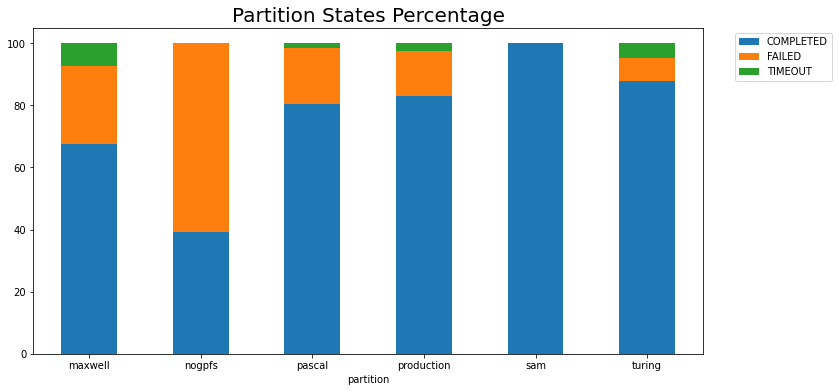

In [65]:
dfg = partitions_count_filtered.groupby('partition').sum()
data = dfg.div(dfg.sum(axis=1), axis=0).mul(100)
data.plot(kind='bar', stacked=True, figsize=(12,6))
plt.legend( loc = 'upper right',bbox_to_anchor=(1.2, 1))
plt.title('Partition States Percentage', fontdict = {'fontsize' : 20})
plt.xticks(rotation='horizontal')